In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def clean_cols(df):
    df.columns = df.columns.str.lstrip(' ').str.rstrip(' ')
    return df

def get_insolvencies_by_la():
    df = pd.ExcelFile('data/Individual_insolvencies_by_location_2000-16/Total insolvencies 2000_2016.xlsx')
    df = df.parse('Local Authorities')
    df.iloc[1] = df.iloc[1].ffill()
    df.columns = df.iloc[1].fillna('').astype(str) + ' '+ df.iloc[2].fillna('').astype(str)
    df = clean_cols(df)
    return df

def get_election_data():
    df = pd.read_csv('data/LE2018 ward-by-ward results_ London only [Britain Elects] - Totals.csv')
    df.iloc[0,0] = ''
    df.columns = df.iloc[1].fillna('') + ' ' + df.iloc[0].ffill()
    df = clean_cols(df)
    df = df.drop([0,1])
    return df

In [2]:
df_insolv = get_insolvencies_by_la()

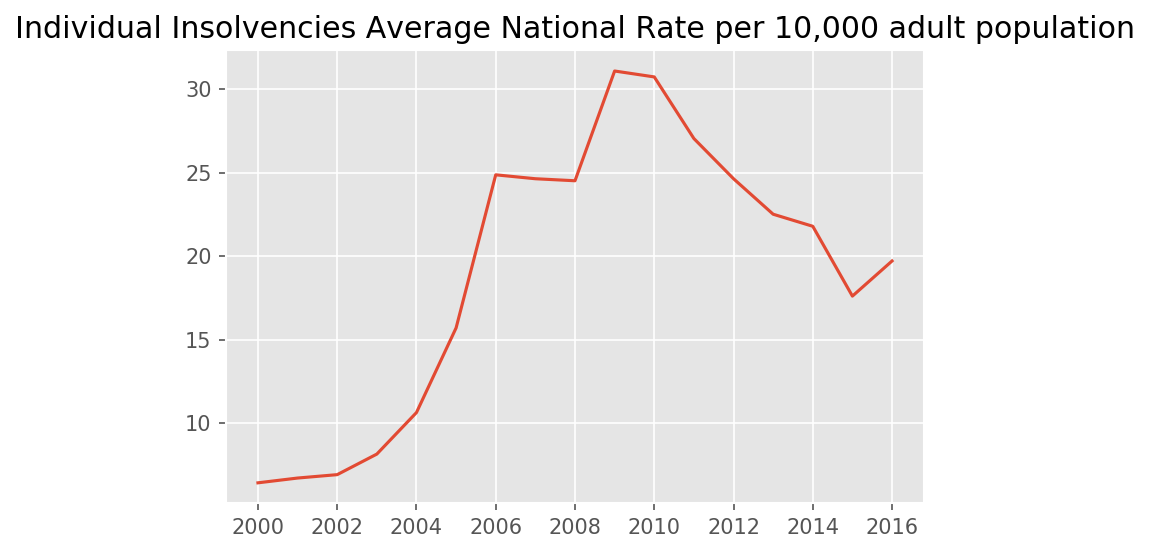

In [3]:
df_insolv_agged = df_insolv.drop([0,1,2])
df_insolv_agged = df_insolv_agged.drop(['Local Authorities'],axis=1)
df_insolv_agged = df_insolv_agged.drop(['Codes'],axis=1)

s = df_insolv_agged.mean()
per_10k = s[s.index.str.contains('Rate per 10,000 adult population')]
per_10k.index = per_10k.index.to_series().apply(lambda x : float(x.split(' ')[0]))

plt.figure(dpi=150)
plt.title('Individual Insolvencies Average National Rate per 10,000 adult population')
per_10k.plot()
plt.show()

In [56]:
df_insolv_agged

,2000 Number of new cases,"2000 Rate per 10,000 adult population",2001 Number of new cases,"2001 Rate per 10,000 adult population",2002 Number of new cases,"2002 Rate per 10,000 adult population",2003 Number of new cases,"2003 Rate per 10,000 adult population",2004 Number of new cases,"2004 Rate per 10,000 adult population",...,2012 Number of new cases,"2012 Rate per 10,000 adult population",2013 Number of new cases,"2013 Rate per 10,000 adult population",2014 Number of new cases,"2014 Rate per 10,000 adult population",2015 Number of new cases,"2015 Rate per 10,000 adult population",2016 Number of new cases,"2016 Rate per 10,000 adult population"
3,32,4.73849,36,5.30387,37,5.44438,57,8.35055,40,5.82997,...,253,35.1653,225,31.0439,187,25.748,187,25.7352,175,24.0322
4,30,2.82446,50,4.72282,55,5.20326,57,5.39977,83,7.85665,...,273,25.4885,249,23.2235,238,22.1771,189,17.574,238,21.9926
5,57,5.34935,58,5.4332,60,5.62688,64,5.98159,83,7.72819,...,297,27.6343,291,27.0768,324,30.0785,201,18.6266,246,22.7597
6,104,7.55314,109,7.83987,96,6.83362,109,7.68965,145,10.1874,...,347,23.0898,411,27.233,457,30.1344,384,25.2535,342,22.3969
7,65,8.59254,69,9.12119,66,8.67782,56,7.32534,85,11.0586,...,264,32.0031,231,27.9536,204,24.6773,187,22.5949,219,26.3452
8,56,6.26419,68,7.61342,56,6.23643,76,8.39529,97,10.6092,...,394,40.337,393,40.1767,305,31.0828,237,24.1212,264,26.7841
9,114,7.82054,114,7.78072,99,6.73616,125,8.47056,165,11.1868,...,495,31.025,514,31.9632,449,27.7193,357,21.8769,405,24.673
10,86,8.66507,95,9.52505,110,10.9396,143,14.0816,108,10.521,...,317,29.0607,271,24.9005,242,22.3029,227,20.8995,274,25.2149
11,117,10.3706,144,12.834,129,11.5017,127,11.2709,161,14.2269,...,544,48.1783,458,40.7582,422,37.7828,336,30.2995,383,34.6324
12,257,13.4202,238,12.5055,288,15.0822,276,14.3103,387,19.7555,...,881,43.5427,801,39.5898,803,39.6939,746,36.679,730,35.7575


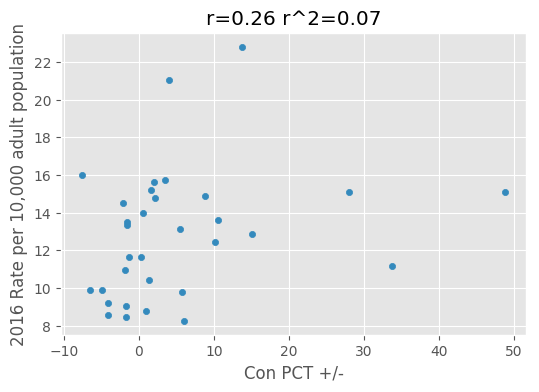

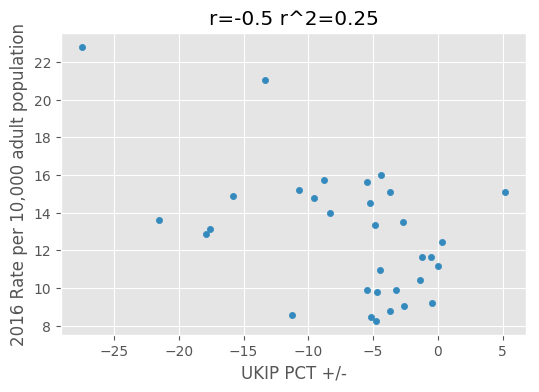

In [71]:
df_elec = get_election_data()


for x_col in ['Con PCT +/-','UKIP PCT +/-']:
    y_col = '2016 Rate per 10,000 adult population'

    df_elect_lab = df_elec[['Authority',x_col]].rename(columns={'Authority' : 'Local Authorities'})
    df_elect_lab['Local Authorities'] = df_elect_lab['Local Authorities'].str.replace('&','and')
    df_elect_lab[x_col] = df_elect_lab[x_col].astype(float)
    df_elect_lab = df_elect_lab.groupby('Local Authorities').mean().reset_index()

    df_insolv_2016_nc = df_insolv.drop([0,1,2])[['Local Authorities',y_col]]
    df_insolv_2016_nc.head()

    df_merged = df_elect_lab.merge(df_insolv_2016_nc,on='Local Authorities')
    df_merged[[x_col, y_col]] = df_merged[[x_col, y_col]].astype(float)

    fig,ax = plt.subplots(dpi=100)
    df_merged.plot(ax=ax,kind='scatter',x=x_col,y=y_col)

    r = df_merged.corr().iloc[0][y_col]
    ax.set_title(f'r={round(r,2)} r^2={round(r**2,2)}')